In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import sem

#### NYBG Data:
##### Get mean and SE for each lawn type
##### Plot data for each day

In [3]:
basepath = 'C:/Users/roseh/Desktop/NYBG_R/'
file_location = 'data/processed'
os.chdir(os.path.join(basepath,file_location))

In [227]:
dataframe = 'NYBG_091522.csv'

In [228]:
df = pd.read_csv(dataframe,usecols=['Date','Flux','Collar','Site','Type','Number']) # read in csv and select columns
date = df['Date'][0][:10]
types = []
means=[]
ses=[]
    
type_grouped = df.groupby('Type')    # group dataframe by type

In [229]:
if 'SV' in type_grouped.groups:         # savannah
    SV = type_grouped.get_group('SV')    
    SV_mean = SV['Flux'].mean()
    SV_se = sem(SV['Flux'])
        
    types.append('Savannah')
    means.append(SV_mean)
    ses.append(SV_se)
else:
    pass

In [230]:
if 'TP' in type_grouped.groups:
    TP = type_grouped.get_group('TP')    # tree pit
        
    TP_mean = TP['Flux'].mean()
    TP_se = sem(TP['Flux'])
                    
    types.append('Tree Pit')
    means.append(TP_mean)
    ses.append(TP_se)
else:
    pass

In [231]:
if 'UL' in type_grouped.groups:              #unmanaged lawn
    UL = type_grouped.get_group('UL')
        
    UL_mean = UL['Flux'].mean()
    UL_se = sem(UL['Flux'])
        
    types.append('Unmanaged Lawn')
    means.append(UL_mean)
    ses.append(UL_se)
else:
    pass

In [232]:
if 'ML' in type_grouped.groups:             # managed lawn
    ML = type_grouped.get_group('ML')
        
    ML_mean = ML['Flux'].mean()
    ML_se = sem(ML['Flux'])
        
    types.append('Managed Lawn')
    means.append(ML_mean)
    ses.append(ML_se)
else:
    pass

In [233]:
if 'HL' in type_grouped.groups:                             # hot lawn
    HL= type_grouped.get_group('HL')
                    
    BR_HL_mean = HL['Flux'].loc[HL['Site']=='BR'].mean()    # get mean for site 1
    BW_HL_mean = HL['Flux'].loc[HL['Site']=='BW'].mean()    # get mean for site 2
    HL_array = np.array([BR_HL_mean,BW_HL_mean])            

    HL_mean = HL_array.mean()                               # get mean and se of the site means
    HL_se = sem(HL_array)
       
    types.append('Hot Lawn')
    means.append(HL_mean)
    ses.append(HL_se)
else:
    pass

In [118]:
# if 'FE' in type_grouped.groups:             # added for 5.31.22
#     FE = type_grouped.get_group('FE')
        
#     FE_mean = FE['Flux'].mean()
#     FE_se = sem(FE['Flux'])
        
#     types.append('Forest Edge')
#     means.append(FE_mean)
#     ses.append(FE_se)
# else:
#     pass

In [119]:
# if 'FI' in type_grouped.groups:             # add for 5.31.22
#     FI = type_grouped.get_group('FI')
        
#     FI_mean = FI['Flux'].mean()
#     FI_se = sem(FI['Flux'])
        
#     types.append('Forest Interior')
#     means.append(FI_mean)
#     ses.append(FI_se)
# else:
#     pass

In [234]:
if 'FE' in type_grouped.groups:                           # forest edge
    FE = type_grouped.get_group('FE')    
    FE_34_mean = FE['Flux'].loc[(FE['Number']==3) | (FE['Number']==4)].mean()
    FE_12_mean = FE['Flux'].loc[(FE['Number']==1) | (FE['Number']==2)].mean()
    FE_array = np.array([FE_34_mean,FE_12_mean])

    FE_mean = FE_array.mean()
    FE_se = sem(FE_array)
        
    types.append('Forest Edge')
    means.append(FE_mean)
    ses.append(FE_se)
else:
    pass

In [235]:
if 'FI' in type_grouped.groups:                     # forest interior
    FI = type_grouped.get_group('FI')    
    FI_34_mean = FI['Flux'].loc[(FI['Number']==3) | (FI['Number']==4)].mean()
    FI_12_mean = FI['Flux'].loc[(FI['Number']==1) | (FI['Number']==2)].mean()
    FI_array = np.array([FI_34_mean,FI_12_mean])

    FI_mean = FI_array.mean()
    FI_se = sem(FI_array)
        
    types.append('Forest Interior')
    means.append(FI_mean)
    ses.append(FI_se)
else:
    pass

In [236]:
data = {'date': date,
        'type': types,
        'mean':means,
        'se':ses}
                    
plot_df = pd.DataFrame(data)

In [237]:
plot_df

,date,type,mean,se
0,9/15/2022,Savannah,4.266980,0.273198
1,9/15/2022,Tree Pit,14.938573,2.947394
2,9/15/2022,Unmanaged Lawn,6.027475,1.117915
3,9/15/2022,Managed Lawn,10.375090,0.946280
4,9/15/2022,Hot Lawn,14.505707,3.208517
5,9/15/2022,Forest Edge,4.764515,0.414260
6,9/15/2022,Forest Interior,5.569779,0.288236


In [238]:
output_folder = 'C:/Users/roseh/Desktop/NYBG_R/data/processed'
filename = 'plotdata_' + dataframe
path = os.path.join(output_folder,filename)
plot_df.to_csv(path)

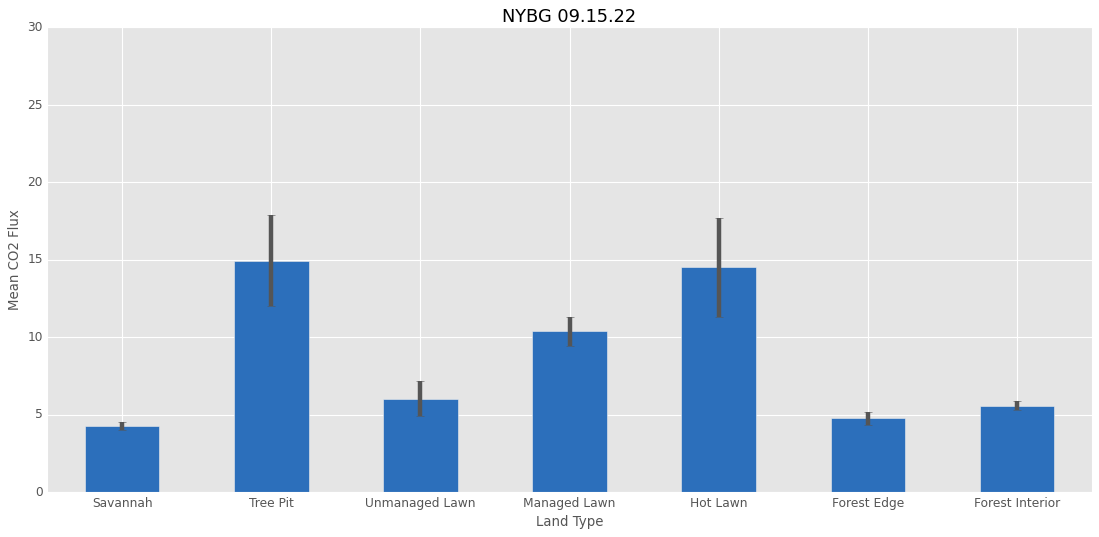

In [239]:
title = 'NYBG 09.15.22'
color = 'xkcd:medium blue'
plt.style.use('ggplot')

ax = plot_df.plot(x='type',
                  y='mean',
                  kind='bar',
                  yerr='se',
                  figsize=(15,7),
                  rot=0,
                 fontsize=11,
                 capsize=4,
                 legend=False,
                 color = color,
                 ylim=[0,30])
ax.set_title(title,fontsize=16)
ax.set_ylabel('Mean CO2 Flux',fontsize=12)
ax.set_xlabel('Land Type',fontsize=12)
plt.show()
    
    

In [240]:
output_folder = 'C:/Users/roseh/Desktop/NYBG_R/reports/figures'
filename = f'{title}.png'
ax.figure.savefig(os.path.join(output_folder,filename))